In [1]:
import numpy as np
import matplotlib.pyplot as plt


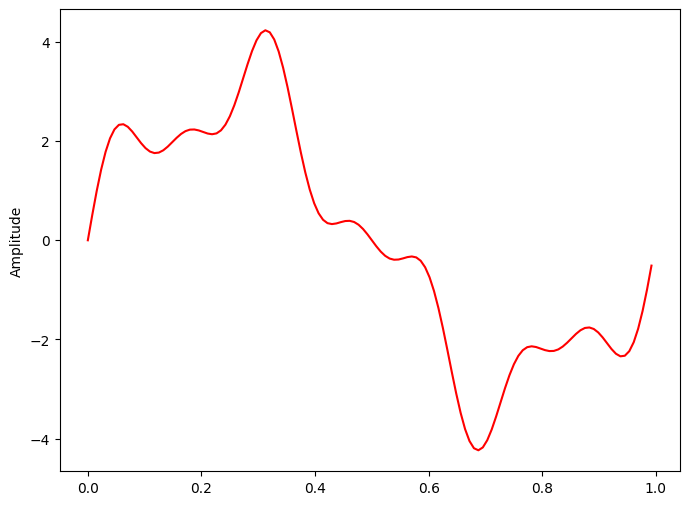

In [2]:
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [3]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate( [X_even+factor[:int(N/2)]*X_odd, X_even+factor[int(N/2):]*X_odd])
           
        return X
        

Text(0, 0.5, 'FFT Amplitude |X(freq)|')

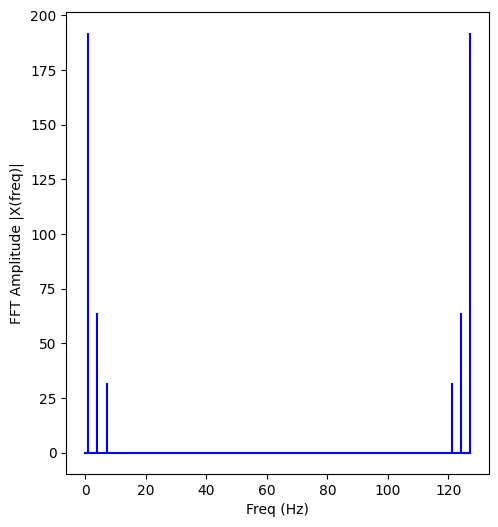

In [4]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12,6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

In [5]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

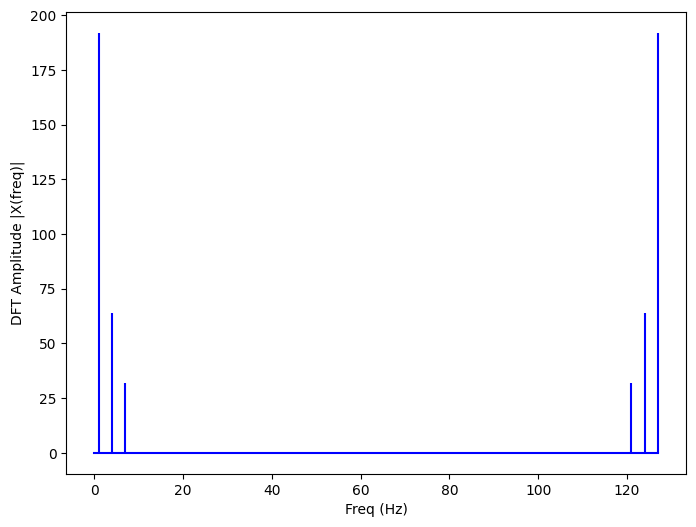

In [6]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

In [7]:
def generate_noisy_sine_wave(freq, amplitude, noise_level, num_samples):
    dt = 1/num_samples
    t = np.arange(0, 1, dt)
    clean_signal = amplitude * np.sin(2 * np.pi * freq * t)
    noise = np.random.normal(scale=noise_level, size=num_samples)
    noisy_signal = clean_signal + noise
    return noisy_signal , clean_signal,t

In [8]:
# Parameters
frequency = 5  # Frequency of the sine wave
amplitude = 1  # Amplitude of the sine wave
noise_level = 0.5  # Level of noise to add to the sine wave
num_samples = 1000  # Number of samples in the sine wave

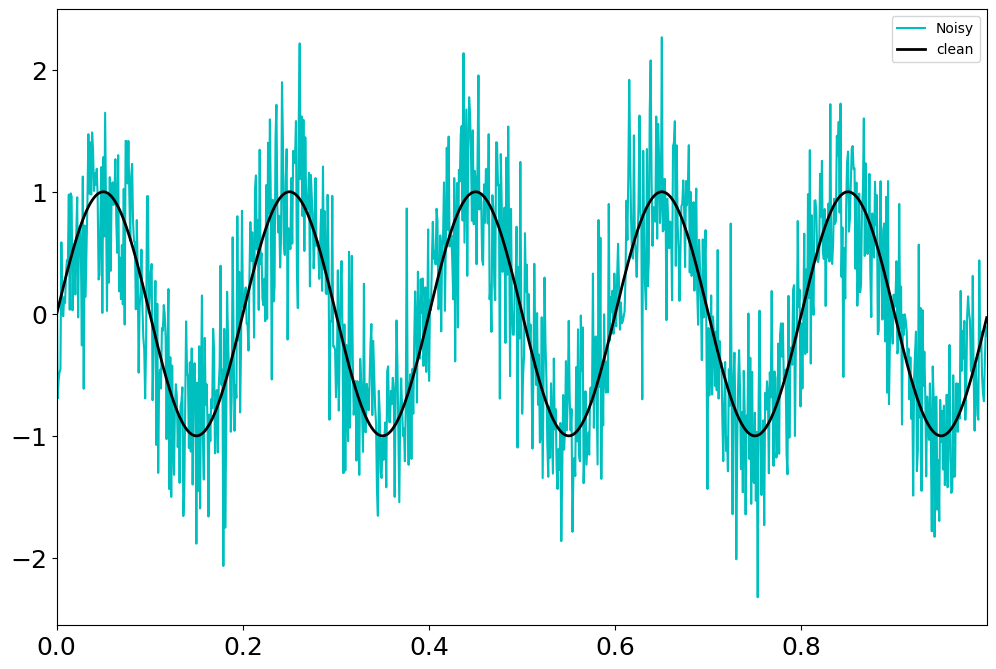

In [9]:
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 18})

noise_signal, original_signal,t = generate_noisy_sine_wave(frequency,amplitude,noise_level,num_samples)

plt.plot(t,noise_signal,color='c',lw=1.5,label='Noisy')
plt.plot(t,original_signal,color='k',lw=2,label='clean')
plt.xlim(t[0],t[-1])
plt.legend(fontsize=10, loc='upper right')

c:\Users\Mouliprasanna\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Mouliprasanna\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

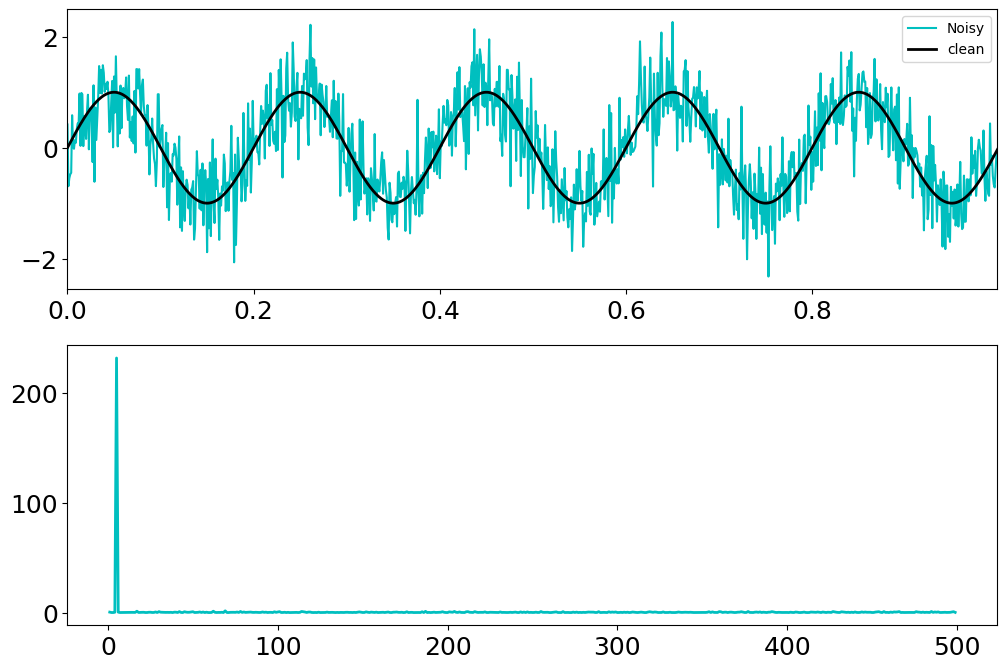

In [10]:
n=len(t)
dt= 1/num_samples
fhat = np.fft.fft(noise_signal,n)
PSD = fhat * np.conj(fhat)/n
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,noise_signal,color='c',lw=1.5,label='Noisy')
plt.plot(t,original_signal,color='k',lw=2,label='clean')
plt.xlim(t[0],t[-1])
plt.legend(fontsize=10, loc='upper right')

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',lw=2,label='Noisy')
plt.xlim(freq[L[0],freq[L[-1]]])
plt.legend(fontsize=10, loc='upper right')

plt.show()

In [ ]:
indicens = PSD > 150          # keeping certain PSD value to eleminate the noises 
PSDClean = PSD * indicens
fhat = indicens * fhat 
ffilt = np.fft.ifft(fhat)

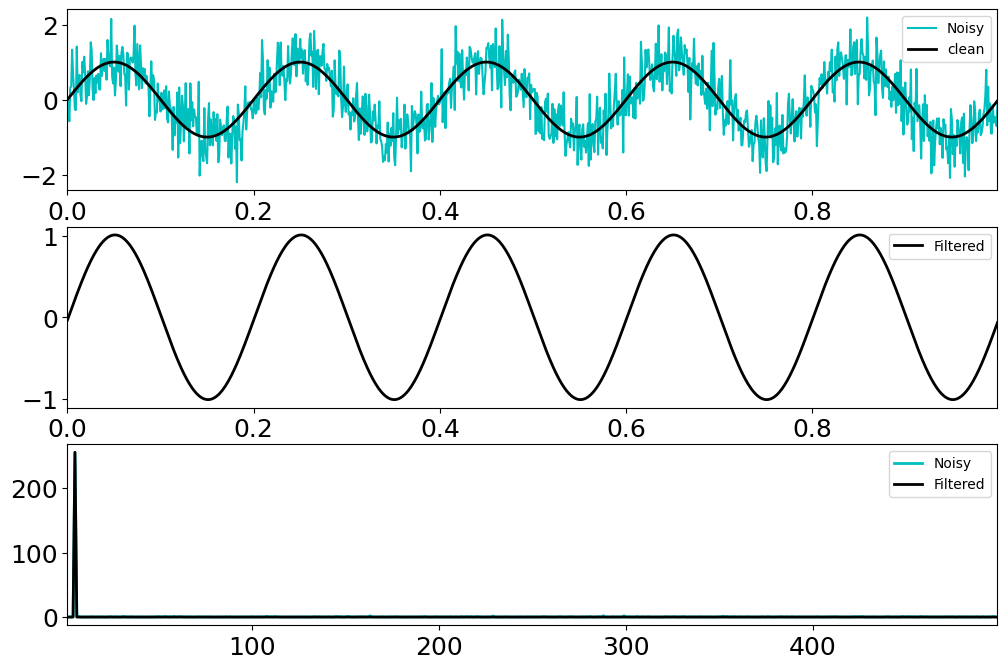

In [ ]:
fig , axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,noise_signal,color='c',lw=1.5,label='Noisy')
plt.plot(t,original_signal,color='k',lw=2,label='clean')
plt.xlim(t[0],t[-1])
plt.legend(fontsize=10, loc='upper right')

plt.sca(axs[1])
plt.plot(t,ffilt , color='k',lw=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend(fontsize=10, loc='upper right')

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='c',lw=2,label='Noisy')
plt.plot(freq[L],PSDClean[L],color='k',lw=2,label='Filtered')
plt.xlim(L[0],L[-1])
plt.legend(fontsize=10, loc='upper right')

plt.show()